# TASK #1 UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


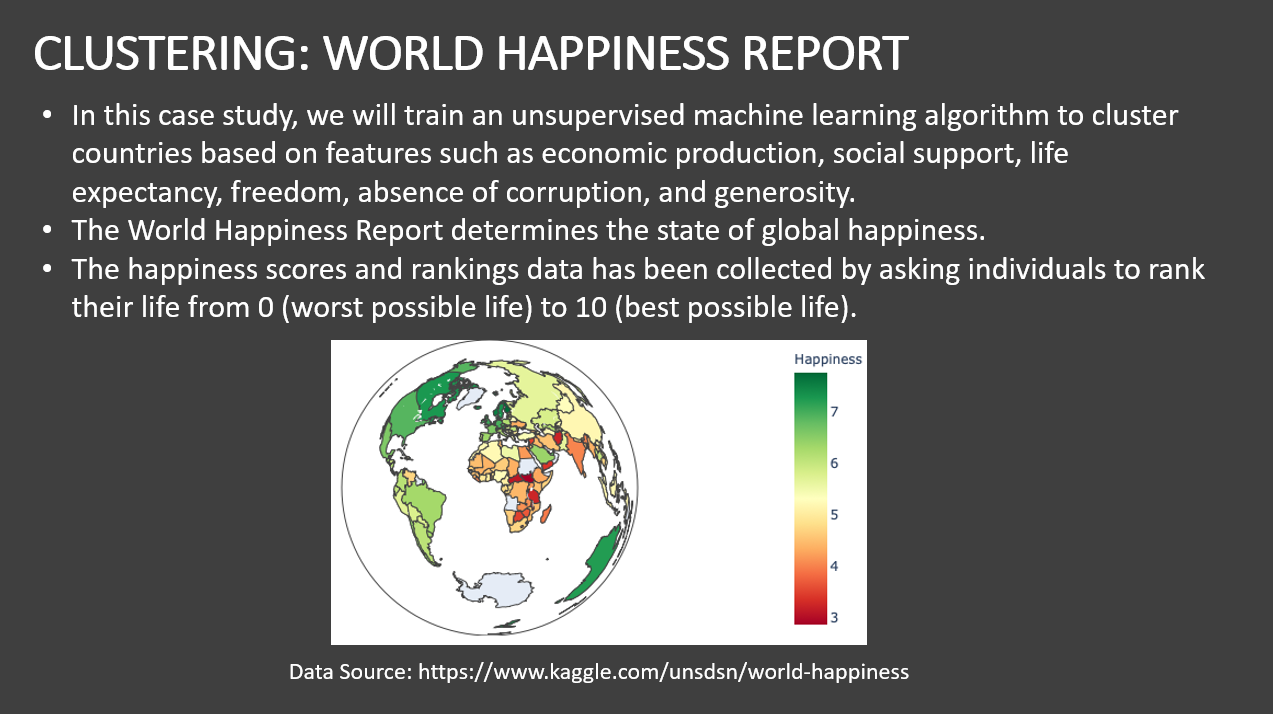

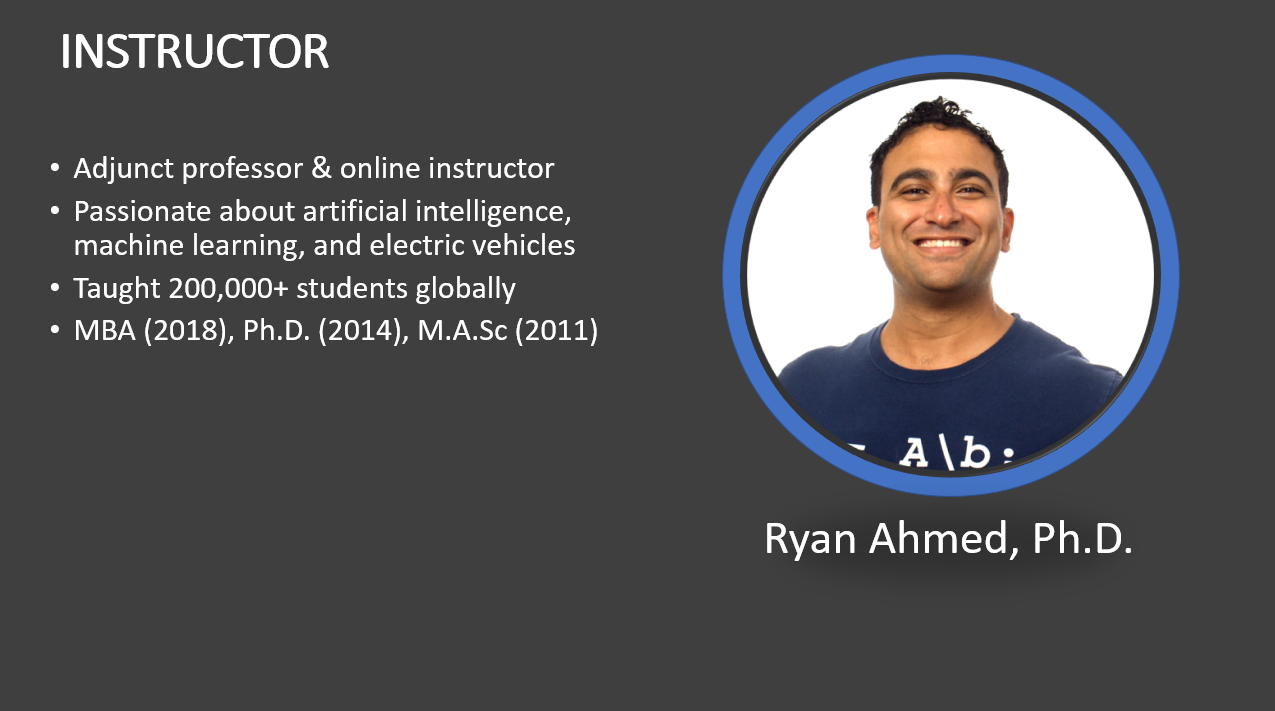

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [ ]:
# Get the required dependencies
! pip install bubbly
#! pip install iplot ##iplot installed ahead from the plotly package
! pip install chart_studio

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [ ]:
# Import csv file into pandas dataframe


In [ ]:
# print the first 5 rows of the dataframe


MINI CHALLENGE #1: 
- Find out how many samples exist in the DataFrame using two different methods.
- Select your own country from the dataframe and explore scores. Perform sanity check. 

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
# Check the number of non-null values in the dataframe


In [ ]:
# Check Null values


In [ ]:
# Obtain the Statistical summary of the dataframe


In [ ]:
# check the number of duplicated entries in the dataframe
 # since there are no duplicates, no further action is required

MINI CHALLENGE #2:
- What is the country that has the maximum happiness score? What is the perception of corruption in this country?

# TASK #4: PERFORM DATA VISUALIZATION - PART #1

In [ ]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))

# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 


In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize = (20, 50))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.distplot(happy_df[columns[i]], color = 'r');
  plt.title(columns[i])

plt.tight_layout()

MINI CHALLENGE #3:
- Plot the correlation matrix and comment on the results. 


# TASK #5: PERFORM DATA VISUALIZATION - PART #2

In [ ]:
# Plot the relationship between score, GDP and region


In [ ]:
# Plot the relationship between score and GDP (while adding color and size)

fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [ ]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(happy_df, x = 'Freedom to make life choices', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()

MINI CHALLENGE #4: 
- Plot a similar type of plots for 'Healthy life expectancy' and 'Score'

# TASK #6: PREPARE THE DATA TO FEED THE CLUSTERING MODEL

In [ ]:
# We are going to create clusters without the use of happiness score and rank to see which countries fall under similar clusters

In [ ]:
# Select the data without rank and happiness score


In [ ]:
# Scale the data


# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS CLUSTERING ALGORITHM

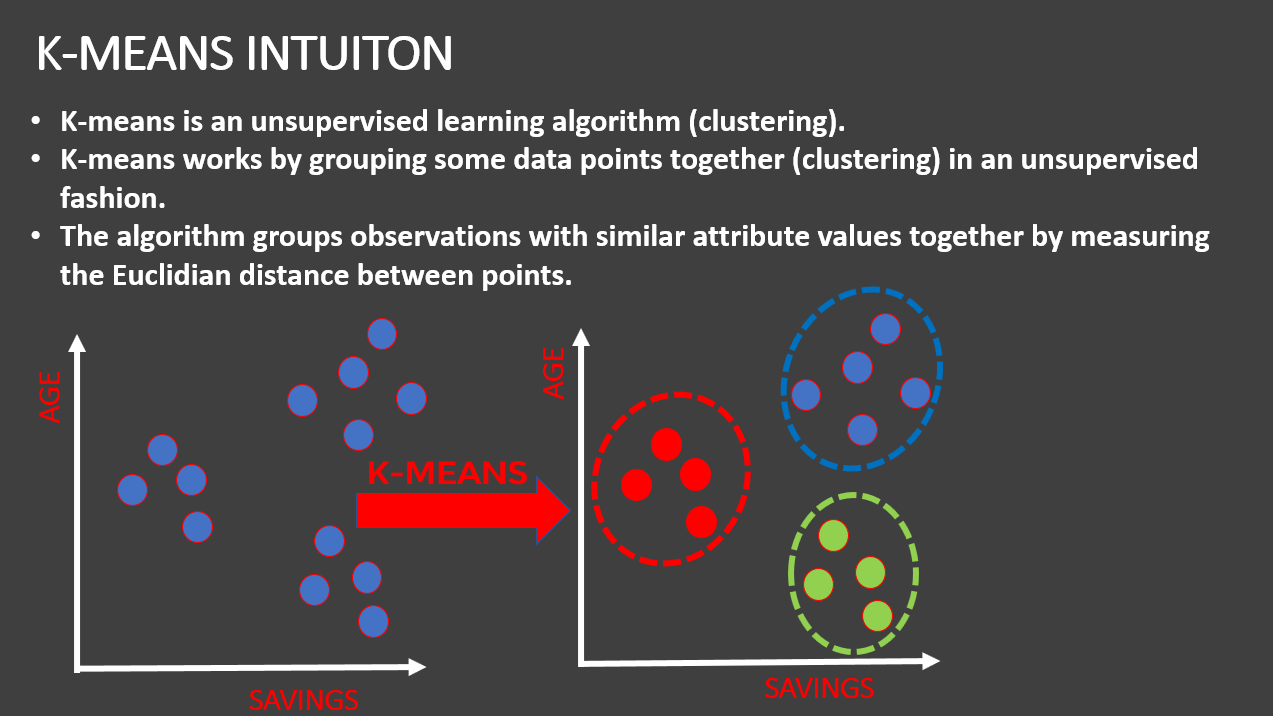

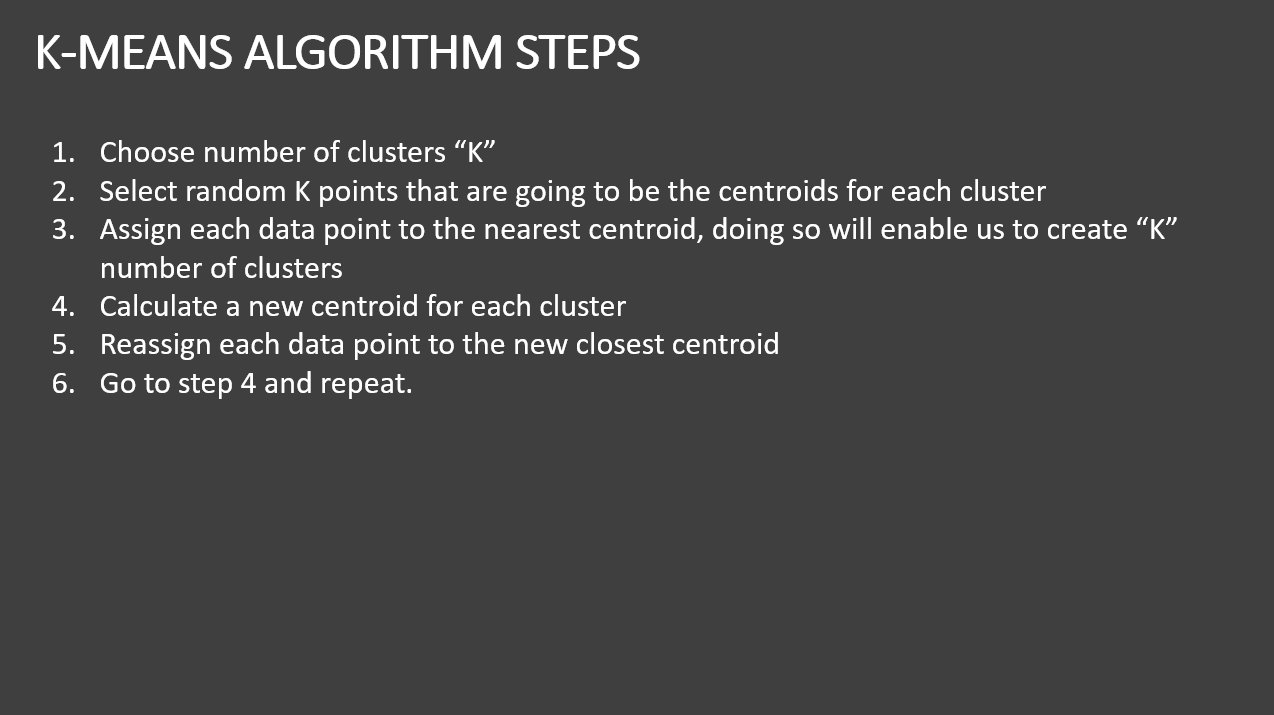

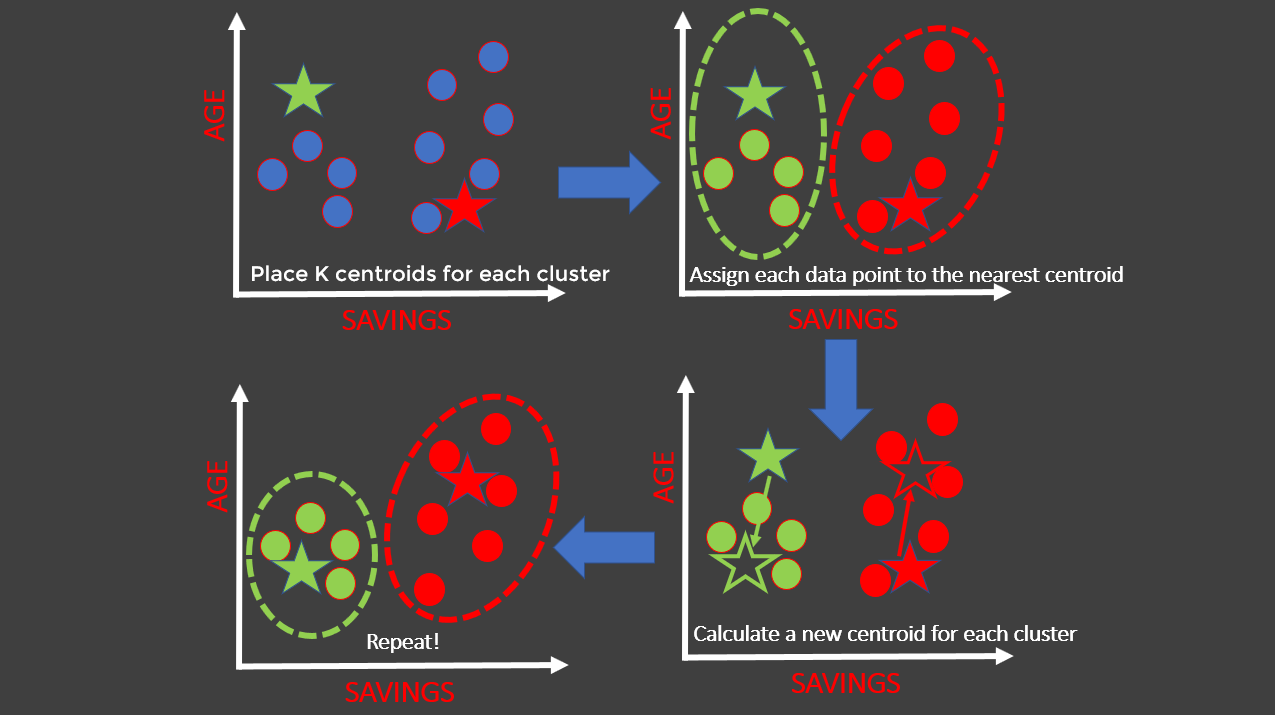

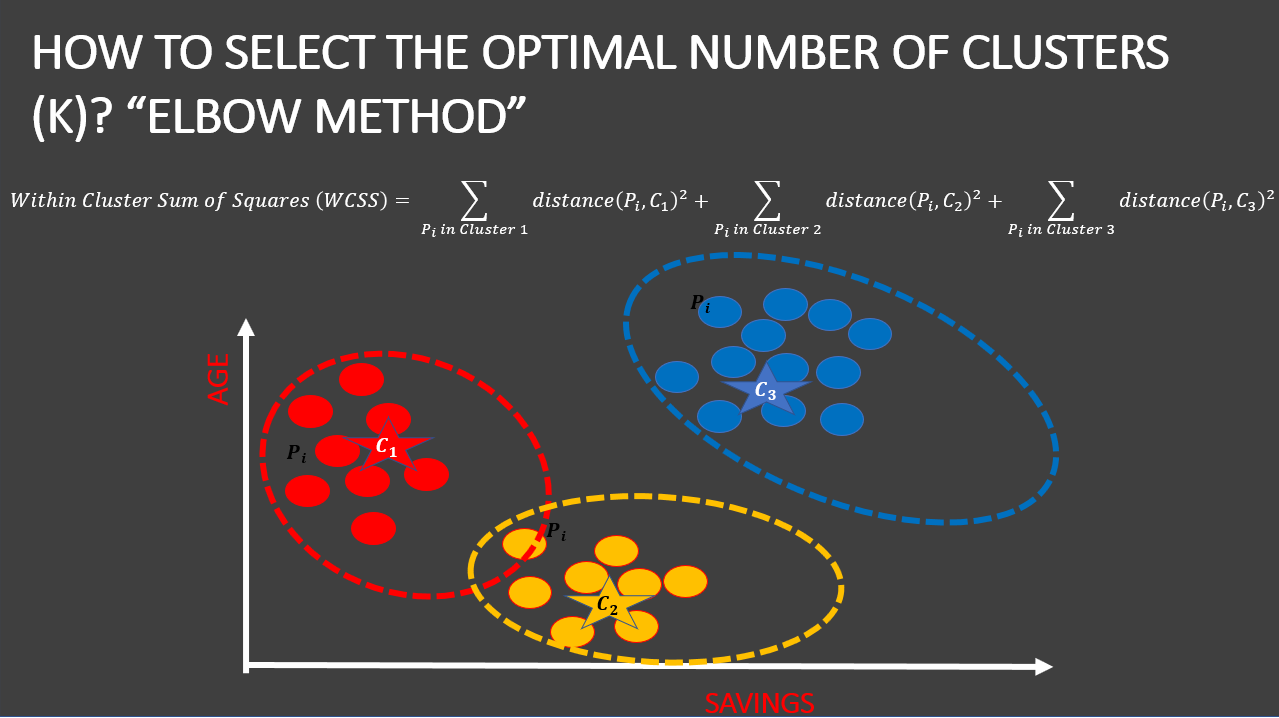

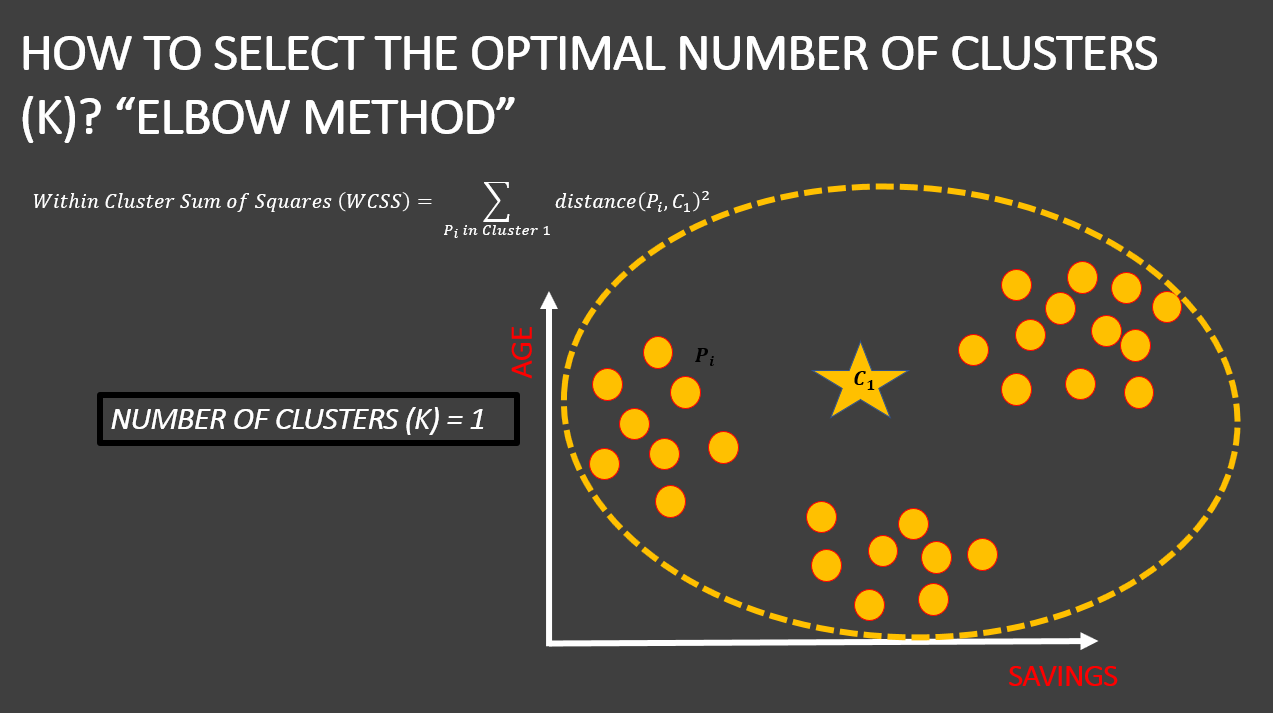

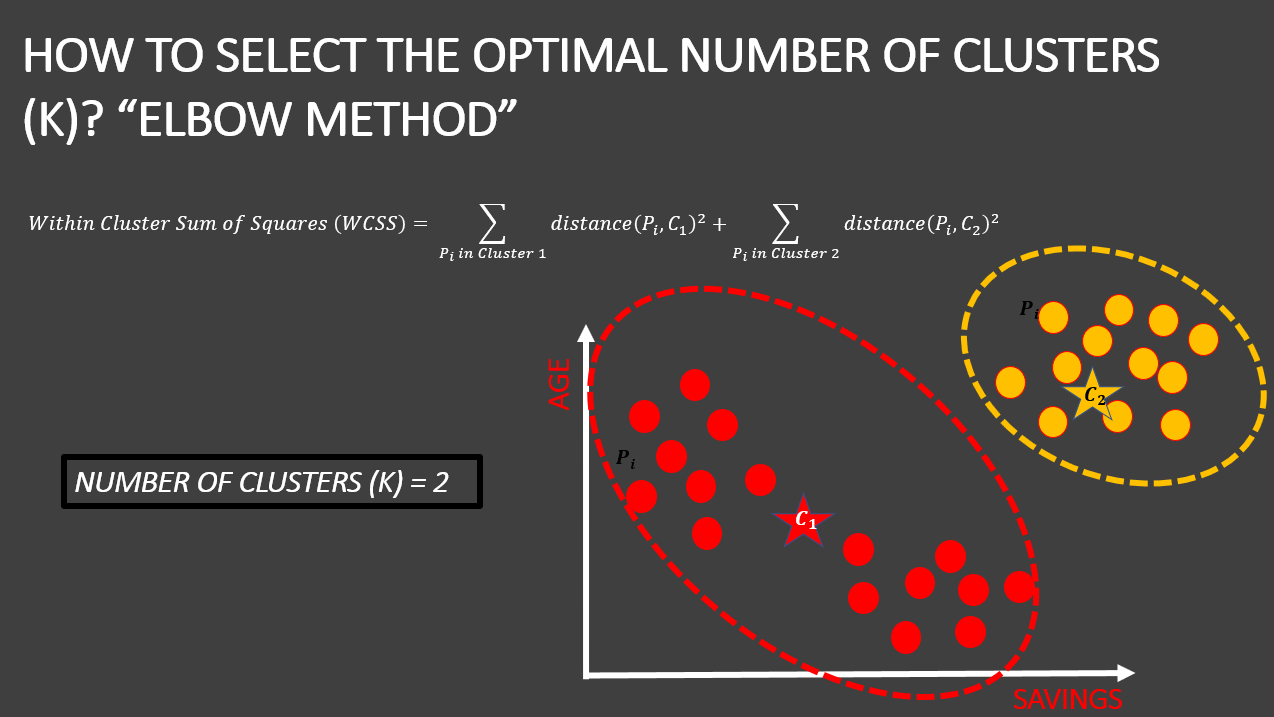

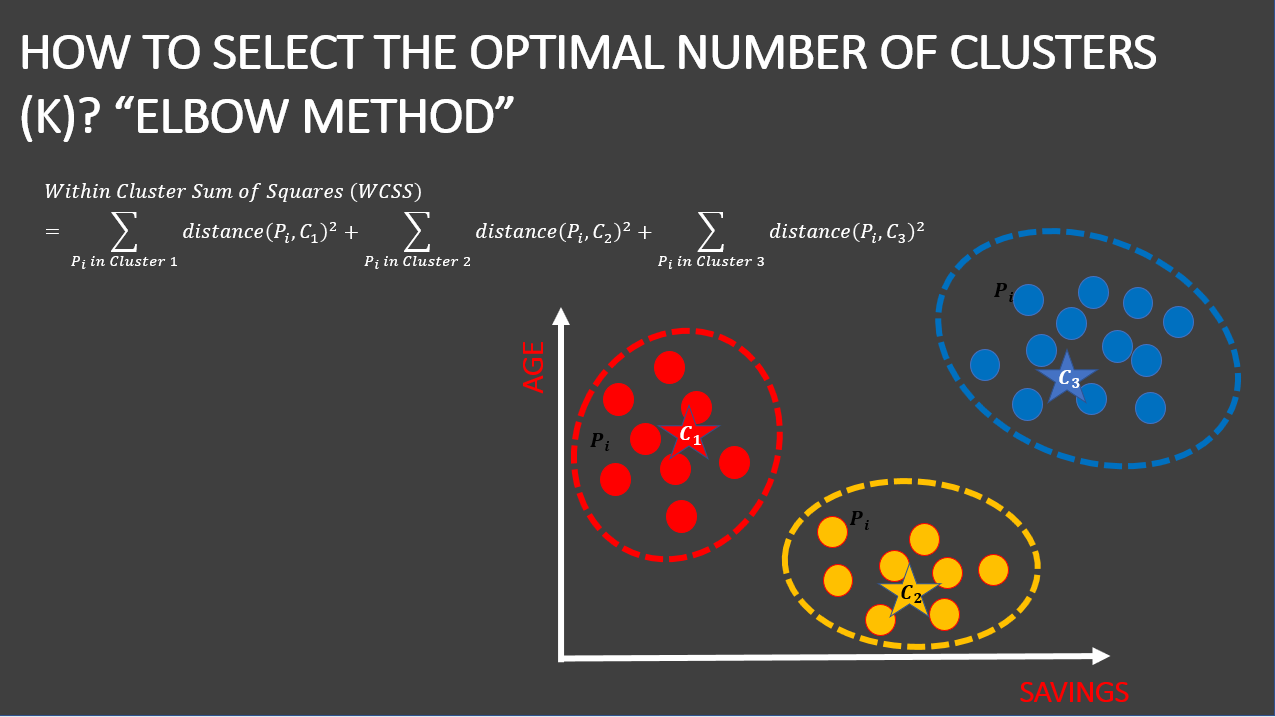

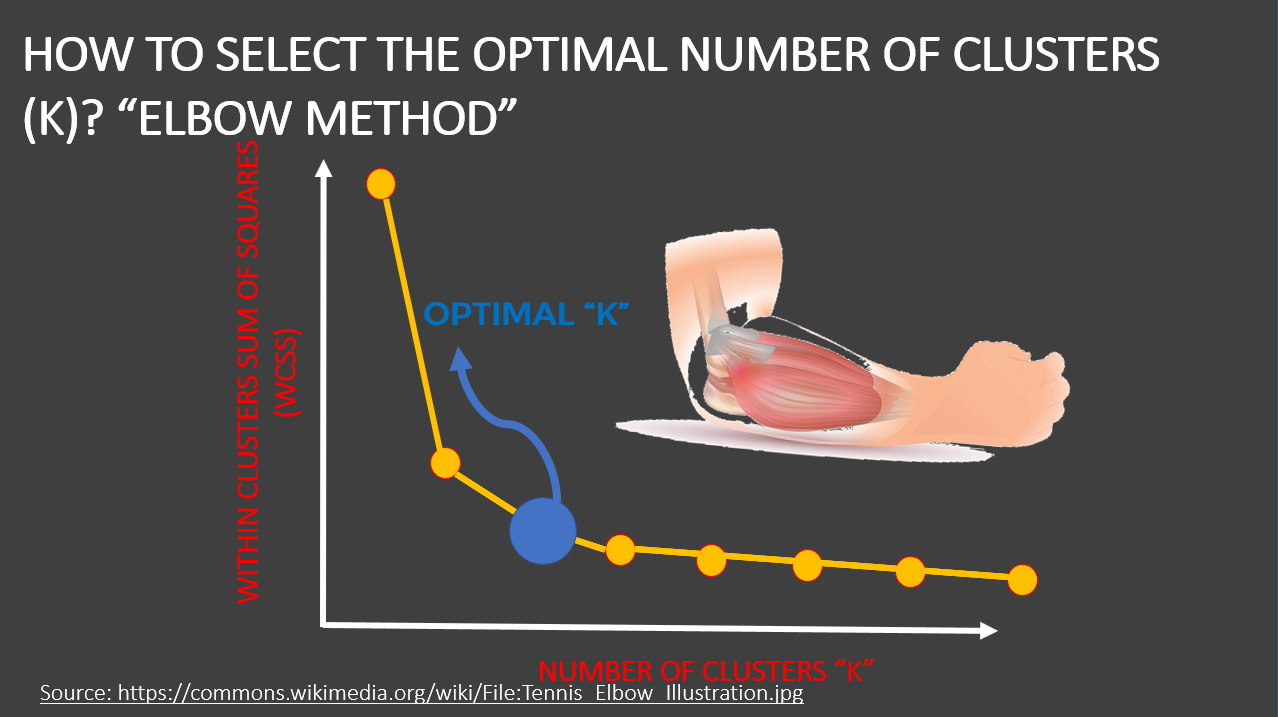

# TASK #8: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:


plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [ ]:
# From this we can observe that 3rd cluster seems to be forming the elbow of the curve. 
# Let's choose the number of clusters to be 3.

# TASK #9: APPLY K-MEANS METHOD

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_seg.columns])
cluster_centers      

In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_seg.columns])
cluster_centers


- Cluster 0: countries that have GDP in the range of 0.6 to 1.4 and have high social support. These countries have medium life expectancy and have high freedom to make life choices. These counties have low generosity and low perception of corruption.

- Cluster 1: countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

- Cluster 2: countries that have low GDP average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

In [ ]:
labels.shape # Labels associated to each data point

In [ ]:
labels.max()

In [ ]:
labels.min()

In [ ]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans


In [ ]:
# concatenate the clusters labels to our original dataframe
happy_df_cluster = pd.concat([happy_df, pd.DataFrame({'cluster':labels})], axis = 1)
happy_df_cluster

In [ ]:
# Plot the histogram of various clusters
for i in df_seg.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = happy_df_cluster[happy_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()



MINI CHALLENGE #5:
- Try the same model with 4 clusters 

# TASK #10: VISUALIZE THE CLUSTERS

In [ ]:
# Plot the relationship between cluster and score 

fig = px.scatter(happy_df_cluster, x = 'cluster', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [ ]:
# Plot the relationship between cluster and GDP

fig = px.scatter(happy_df_cluster, x='cluster', y='GDP per capita',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [ ]:
# Visaulizing the clusters with respect to economy, corruption, gdp, rank and their scores

from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=happy_df_cluster, 
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',  
    color_column='cluster', z_column='Healthy life expectancy', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Life expectancy on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})

MINI CHALLENGE #6:
- Plot the similar type of visualization having 'Generosity' instead of 'Healthy life expectancy'

In [ ]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth', 
           locations = happy_df_cluster["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happy_df_cluster['cluster'], 
           text = happy_df_cluster["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# GREAT JOB!

MINI CHALLENGE #1 SOLUTION: 
- Find out how many samples exist in the DataFrame using two different methods
- Select your own country from the dataframe and explore scores. Perform sanity check. 

In [ ]:
len(happy_df)

In [ ]:
happy_df

In [ ]:
happy_df[happy_df['Country or region']=='Canada']

MINI CHALLENGE #2 SOLUTION:
- What is the country that has the maximum happiness score? What is the perception of corruption in this country?

In [ ]:
happy_df[happy_df['Score'] == 7.769000]

MINI CHALLENGE #3 SOLUTION:
- Plot the correlation matrix and comment on the results. 

In [ ]:
# Get the correlation matrix
corr_matrix = happy_df.corr()
corr_matrix
sns.heatmap(corr_matrix, annot = True)

MINI CHALLENGE #4 SOLUTION:
- Plot the similar type of plot for 'Healthy life expectancy' and 'Score'

In [ ]:
# Plot the relationship between score and healthy life expectancy
fig = px.scatter(happy_df, x = 'Healthy life expectancy', y = "Score", text = 'Country or region')
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 1000)
fig.show()

In [ ]:
# Plot the relationship between score and healthy life expectancy
fig = px.scatter(happy_df, x = 'Healthy life expectancy', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Healthy life expectancy'
)
fig.show()

MINI CHALLENGE #5 SOLUTION:
- Try the same model with 4 clusters 

In [ ]:
kmeans = KMeans(4)
kmeans.fit(scaled_data)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(scaled_data)

MINI CHALLENGE #6 SOLUTION:
- Plot the similar type of visualization having 'Generosity' instead of 'Healthy life expectancy'

In [ ]:
from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=happy_df_cluster, 
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',  
    color_column='cluster', z_column='Generosity', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Generosity on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})